In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed = confirmed.loc[:, :'3/3/20']

confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,5,5,5,5,5,5,5,5,5
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,3,5
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
last_date = "3/2/20"

In [3]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()

In [4]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

deaths = deaths.loc[:, :'3/2/20']
recovered = recovered.loc[:, :'3/2/20']

display(deaths.head()) # para mostrar as duas tabelas no mesma célula (com print fica feio)
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def latest_by_country(data): 
    return data.groupby("Country/Region").sum().iloc[:, -1] # mudou pq ele definiu a ultima data dele la e eu copiei


In [6]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis = 1) # se deixar o axis default (0) ele empilha as series (uma embaixo da outra)
combined.columns = ['confirmed', 'deaths', 'recovered'] # renomeando as colunas porque estava com a data
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,5,0,0
Albania,0,0,0
Algeria,5,0,0
Andorra,1,0,0
Angola,0,0,0


In [7]:
sum_up = combined.sum()
letality_rate_1 = sum_up['deaths'] / sum_up['confirmed']
letality_rate_2 = sum_up['deaths'] / (sum_up['recovered'] + sum_up['deaths'])

In [8]:
letality_rate_1 = combined['deaths'] / combined['confirmed'] * 100
letality_rate_2 = combined['deaths'] / (combined['recovered'] + combined['deaths']) * 100

In [9]:
confirmed.set_index("Country/Region").loc['China'].sum().tail()

2/28/20    78928
2/29/20    79356
3/1/20     79932
3/2/20     80136
3/3/20     80261
dtype: object

In [10]:
is_china = confirmed["Country/Region"] == "China"
is_china.value_counts()

False    251
True      34
Name: Country/Region, dtype: int64

In [11]:
is_china.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [12]:
confirmed['is_china'] = is_china
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,is_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,1,1,1,1,1,1,3,5,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [13]:
# query só de China
display(confirmed.query("is_china == True").head())
display(confirmed.query('is_china').tail()) # nem precisava do 'True'

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,is_china
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,989,989,990,990,990,990,990,True
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,399,400,400,410,410,411,413,414,414,True
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,True
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,293,294,294,296,296,296,296,296,296,True
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,True


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,is_china
88,Tibet,China,31.6927,88.0924,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,True
89,Unknown,China,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
90,Xinjiang,China,41.1129,85.2401,0,2,2,3,4,5,...,76,76,76,76,76,76,76,76,76,True
91,Yunnan,China,24.9740,101.4870,1,2,5,11,16,26,...,174,174,174,174,174,174,174,174,174,True
92,Zhejiang,China,29.1832,120.0934,10,27,43,62,104,128,...,1205,1205,1205,1205,1205,1205,1205,1206,1213,True


In [14]:
confirmed.groupby('is_china').sum() # agora ja ta separado com o que é china e o que não é

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20
is_china,,,,,,,,,,,,,,,,,,,,,
False,4625.043446,2630.930924,9,14,24,31,45,52,71,82,...,1968,2317,2658,3218,4128,5224,6668,8471,10247,12734
True,1085.292300,3688.937700,548,643,920,1406,2075,2877,5509,6087,...,77022,77241,77754,78166,78600,78928,79356,79932,80136,80261


<AxesSubplot:ylabel='2/3/20'>

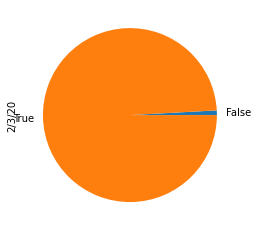

In [15]:
confirmed.groupby('is_china').sum()['2/3/20'].plot(kind='pie') # nao é o mais indicado porque nao da pra ter muita ideia da proporcao

<AxesSubplot:xlabel='is_china'>

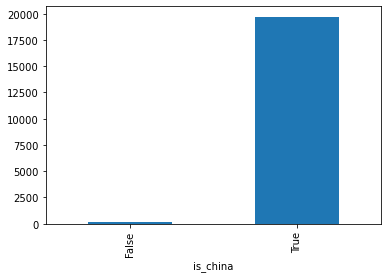

In [16]:
confirmed.groupby('is_china').sum()['2/3/20'].plot(kind='bar')

In [17]:
confirmed['is_china']

0      False
1      False
2      False
3      False
4      False
       ...  
280    False
281    False
282    False
283    False
284    False
Name: is_china, Length: 285, dtype: bool

In [18]:
import numpy as np

np.where(confirmed['is_china'], 'China', "Others") # essa função do numpy vai colocar "china" onde for True e "Others" onde for False

array(['Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China', 'China', 'China', 'China',
       'China', 'China', 'China', 'China',

In [19]:
confirmed['is_china_label'] = np.where(confirmed['is_china'], 'China', "Others")
display(confirmed.head())
display(confirmed.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,is_china,is_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,False,Others
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Others
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1,1,1,1,1,1,3,5,False,Others
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,False,Others
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Others


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,is_china,is_china_label
280,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Others
281,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Others
282,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Others
283,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Others
284,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,Others


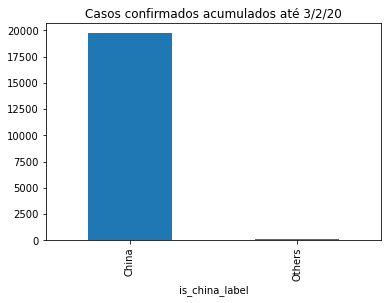

In [20]:
confirmed.groupby('is_china_label').sum()['2/3/20'].plot(kind='bar') # agora com os rótulos apropriados
plt.title(f"Casos confirmados acumulados até {last_date}")
plt.show()

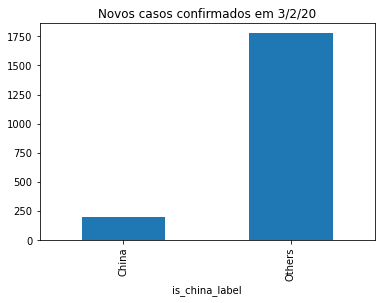

In [21]:
summed = confirmed.groupby('is_china_label').sum()
summed['delta'] = summed['3/2/20'] - summed['3/1/20']
summed['delta'].plot(kind='bar')

plt.title(f"Novos casos confirmados em {last_date}")
plt.show()

<AxesSubplot:xlabel='is_china_label'>

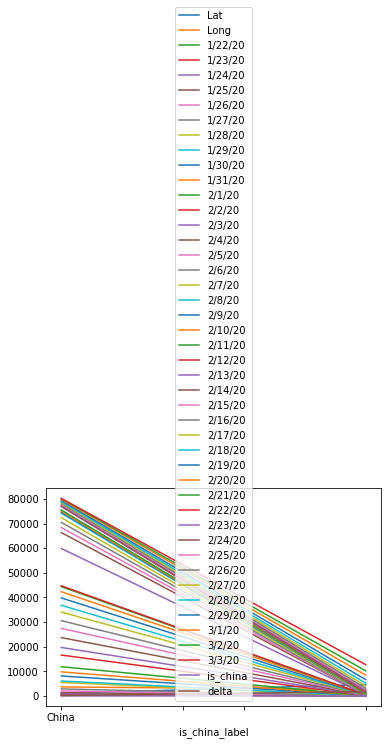

In [22]:
summed.plot() # nao faz sentido porque ele plotou as linhas como se fossem colunas

In [23]:
summed

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,is_china,delta
is_china_label,,,,,,,,,,,,,,,,,,,,,
China,1085.292300,3688.937700,548,643,920,1406,2075,2877,5509,6087,...,77754,78166,78600,78928,79356,79932,80136,80261,34,204
Others,4625.043446,2630.930924,9,14,24,31,45,52,71,82,...,2658,3218,4128,5224,6668,8471,10247,12734,0,1776


In [24]:
summed.T.head(10)

is_china_label,China,Others
Lat,1085.2923,4625.043446
Long,3688.9377,2630.930924
1/22/20,548.0000,9.000000
1/23/20,643.0000,14.000000
1/24/20,920.0000,24.000000
1/25/20,1406.0000,31.000000
1/26/20,2075.0000,45.000000
1/27/20,2877.0000,52.000000
1/28/20,5509.0000,71.000000
1/29/20,6087.0000,82.000000


<AxesSubplot:>

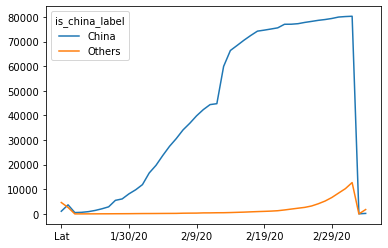

In [25]:
summed.T.plot()

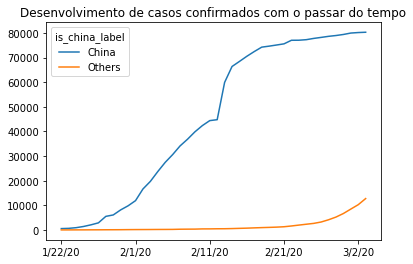

In [26]:
summed.T[2:-2].plot() # descarta os dois primeiros (longitude e latitude) e os dois ultimos (flags de ser china ou n)
plt.title('Desenvolvimento de casos confirmados com o passar do tempo')
plt.show()

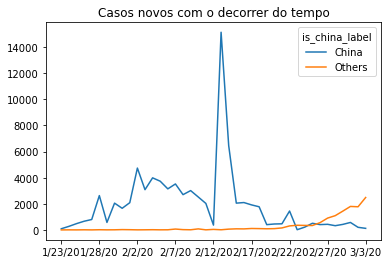

In [27]:
differences = summed.T[2:-2].diff().dropna()
differences.plot()

plt.title('Casos novos com o decorrer do tempo')
plt.show()

In [28]:
cases = confirmed.groupby('is_china_label').sum()[last_date].loc['China']
estimated_population = 1437525528
incidence_ratio = cases / estimated_population * 100000 # para sair medida de incidencia por 100 mil habitantes
incidence_ratio 

# conta péssima, ruim e errada porque usa-se toda a população da China
# usando população muito maior do que deveria

5.574579264097771

In [29]:
un_population = pd.read_csv("https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv")
un_population["PopTotal"] = un_population["PopTotal"] * 1000 # população está em milhares de pessoas na base de dados
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [30]:
un_population.shape

(280932, 10)

In [31]:
un_population.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.000000,280932.000000,280932.000000,280932.000000,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
mean,703.125062,22.411345,2051.026494,2051.526494,2.324362e+05,2.298754e+05,4.128536e+08,426.659040
std,631.959759,55.972847,33.642148,33.642148,6.938837e+05,6.829825e+05,1.308911e+09,2418.990784
min,4.000000,2.000000,1950.000000,1950.500000,6.812000e+00,6.889000e+00,1.510000e+02,0.052000
25%,300.000000,2.000000,2031.000000,2031.500000,1.847834e+03,1.860604e+03,1.240100e+06,34.205250
50%,586.000000,5.000000,2055.000000,2055.500000,1.136849e+04,1.164585e+04,1.420555e+07,91.590000
75%,903.000000,9.000000,2078.000000,2078.500000,8.526402e+04,8.648854e+04,1.171661e+08,216.985750
max,5501.000000,207.000000,2100.000000,2100.500000,1.092000e+07,1.071273e+07,2.163274e+10,56025.839000


In [32]:
un_population_total = un_population.query("Time == 2019")[["Location", "PopTotal"]].set_index("Location") 
un_population_total.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [33]:
combined.join(un_population_total)

,confirmed,deaths,recovered,PopTotal
Afghanistan,5,0,0,38041757.0
Albania,0,0,0,2880913.0
Algeria,5,0,0,43053054.0
Andorra,1,0,0,77146.0
Angola,0,0,0,31825299.0
...,...,...,...,...
West Bank and Gaza,0,0,0,NaN
Winter Olympics 2022,0,0,0,NaN
Yemen,0,0,0,29161922.0
Zambia,0,0,0,17861034.0


In [34]:
combined.join(un_population_total).sort_values("confirmed", ascending=False).head(20) # varios não tiveram sucesso no join

,confirmed,deaths,recovered,PopTotal
China,80261,2914,44854,1.433784e+09
"Korea, South",5186,28,30,NaN
Italy,2502,52,149,6.055009e+07
Iran,2336,66,291,NaN
Diamond Princess,706,6,10,NaN
Japan,298,6,32,1.268603e+08
France,212,3,12,6.512973e+07
United Kingdom,189,0,8,6.753016e+07
Germany,188,0,16,8.351705e+07
Spain,165,0,2,4.673678e+07


In [35]:
un_population.query("Location.str.contains('China')", engine='python') # o 'engine' foi para usar ferramentas do python para a busca (no caso, o str)

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
47824,156,China,2,Medium,1950,1950.5,287739.865,266679.404,554419269.0,59.055
47825,156,China,2,Medium,1951,1951.5,295567.965,274341.143,569909108.0,60.705
47826,156,China,2,Medium,1952,1952.5,301939.824,280636.673,582576497.0,62.054
47827,156,China,2,Medium,1953,1953.5,307333.563,286032.319,593365882.0,63.203
47828,156,China,2,Medium,1954,1954.5,312143.382,290908.934,603052316.0,64.235
...,...,...,...,...,...,...,...,...,...,...
208370,2093,"SIDS Atlantic, and Indian Ocean, Mediterranean...",2,Medium,2096,2096.5,11669.853,11116.368,22786221.0,53.016
208371,2093,"SIDS Atlantic, and Indian Ocean, Mediterranean...",2,Medium,2097,2097.5,11665.152,11117.866,22783018.0,53.008
208372,2093,"SIDS Atlantic, and Indian Ocean, Mediterranean...",2,Medium,2098,2098.5,11660.189,11118.950,22779139.0,52.999
208373,2093,"SIDS Atlantic, and Indian Ocean, Mediterranean...",2,Medium,2099,2099.5,11655.070,11119.671,22774741.0,52.989


In [36]:
un_population.query("Location.str.contains('China') and Time==2019", engine='python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
47893,156,China,2,Medium,2019,2019.5,735624.259,698159.433,1.433784e+09,152.722
48777,1105,China (and dependencies),2,Medium,2019,2019.5,751174.575,714459.601,1.465634e+09,155.510
48928,344,"China, Hong Kong SAR",2,Medium,2019,2019.5,3418.487,4017.670,7.436157e+06,7082.054
49812,446,"China, Macao SAR",2,Medium,2019,2019.5,307.706,332.740,6.404460e+05,21419.599
50696,158,"China, Taiwan Province of China",2,Medium,2019,2019.5,11824.123,11949.758,2.377388e+07,671.389
140008,948,"Less developed regions, excluding China",2,Medium,2019,2019.5,2518843.362,2458360.347,4.977204e+09,69.541
208293,2093,"SIDS Atlantic, and Indian Ocean, Mediterranean...",2,Medium,2019,2019.5,8421.200,7569.584,1.599078e+07,37.205


In [37]:
def rename_location(location):
    if location == "China":
        return "China" # reproduzi para fins de aprendizado, ja que na base do video, China estava como "Mainland China"
    if location == 'Republic of Korea':
        return "Korea, South"
    if location == 'Iran (Islamic Republic of)':
        return "Iran"
    if location == 'United States of America':
        return "US"
    return location
un_population_total.index.map(rename_location)

Index(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa', 'African Union: Eastern Africa',
       'African Union: Northern Africa', 'African Union: Southern Africa',
       'African Union: Western Africa',
       'African, Caribbean and Pacific (ACP) Group of States',
       ...
       'Western Africa', 'Western Asia', 'Western Europe',
       'Western European and Others Group (WEOG)', 'Western Sahara', 'World',
       'World Bank Regional Groups (developing only)', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Location', length=477)

In [38]:
un_population_total['location_for_who'] = un_population_total.index.map(rename_location)
un_population_total.head()

,PopTotal,location_for_who
Location,,
Afghanistan,3.804176e+07,Afghanistan
Africa,1.308064e+09,Africa
African Group,1.306321e+09,African Group
African Union,1.306903e+09,African Union
African Union: Central Africa,1.540137e+08,African Union: Central Africa


In [39]:
un_population_total.query("location_for_who=='China'") # lembrando que no caso do video era "Mainland China"

,PopTotal,location_for_who
Location,,
China,1.433784e+09,China


In [40]:
un_population_total = un_population_total.set_index('location_for_who')
un_population_total.head()

,PopTotal
location_for_who,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


In [41]:
combined.join(un_population_total).sort_values('confirmed', ascending=False).head(20) # vendo os 10 primeiros para ver quais nao estam combinando por divergencia de nome

,confirmed,deaths,recovered,PopTotal
China,80261,2914,44854,1.433784e+09
"Korea, South",5186,28,30,5.122532e+07
Italy,2502,52,149,6.055009e+07
Iran,2336,66,291,8.291389e+07
Diamond Princess,706,6,10,NaN
Japan,298,6,32,1.268603e+08
France,212,3,12,6.512973e+07
United Kingdom,189,0,8,6.753016e+07
Germany,188,0,16,8.351705e+07
Spain,165,0,2,4.673678e+07


In [42]:
un_population.query("Location.str.contains('Korea') and Time==2019", engine='python') 
# depois de "substituir" a China (que so no video precisava), viu que a coreia do sul 
# tambem estava com nome diferente e, por isso, estava com valor nulo de população

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
63418,408,Dem. People's Republic of Korea,2,Medium,2019,2019.5,12552.762,13113.396,25666158.0,213.156
202989,410,Republic of Korea,2,Medium,2019,2019.5,25649.457,25575.864,51225321.0,526.847


In [43]:
un_population.query("Location.str.contains('Iran') and Time==2019", engine='python') 

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
117713,364,Iran (Islamic Republic of),2,Medium,2019,2019.5,41889.89,41024.003,82913893.0,50.913


In [44]:
un_population.query("Location.str.contains('United States') and Time==2019", engine='python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
263406,850,United States Virgin Islands,2,Medium,2019,2019.5,49.704,54.875,104579.0,298.797
264290,840,United States of America,2,Medium,2019,2019.5,162826.299,166238.618,329064917.0,35.974
265174,1111,United States of America (and dependencies),2,Medium,2019,2019.5,164409.733,167972.987,332382720.0,36.295


In [45]:
combined_expanded = combined.join(un_population_total).sort_values("confirmed", ascending=False).dropna()
combined_expanded.head(10)

,confirmed,deaths,recovered,PopTotal
China,80261,2914,44854,1.433784e+09
"Korea, South",5186,28,30,5.122532e+07
Italy,2502,52,149,6.055009e+07
Iran,2336,66,291,8.291389e+07
Japan,298,6,32,1.268603e+08
France,212,3,12,6.512973e+07
United Kingdom,189,0,8,6.753016e+07
Germany,188,0,16,8.351705e+07
Spain,165,0,2,4.673678e+07
Singapore,110,0,78,5.804343e+06


In [46]:
combined_expanded['incidence_ratio'] = combined_expanded['confirmed'] / combined_expanded['PopTotal'] * 100000 # incidencia por 100000 pessoas
combined_expanded['mortality_rate'] = combined_expanded['deaths'] / combined_expanded['PopTotal'] * 100000 # incidencia por 100000 pessoas
combined_expanded.head(10)

,confirmed,deaths,recovered,PopTotal,incidence_ratio,mortality_rate
China,80261,2914,44854,1.433784e+09,5.597846,0.203238
"Korea, South",5186,28,30,5.122532e+07,10.123899,0.054660
Italy,2502,52,149,6.055009e+07,4.132116,0.085879
Iran,2336,66,291,8.291389e+07,2.817381,0.079601
Japan,298,6,32,1.268603e+08,0.234904,0.004730
France,212,3,12,6.512973e+07,0.325504,0.004606
United Kingdom,189,0,8,6.753016e+07,0.279875,0.000000
Germany,188,0,16,8.351705e+07,0.225104,0.000000
Spain,165,0,2,4.673678e+07,0.353041,0.000000
Singapore,110,0,78,5.804343e+06,1.895133,0.000000


In [47]:
confirmed.sort_values(last_date, ascending=False). head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,is_china,is_china_label
72,Hubei,China,30.975600,112.270700,444,444,549,761,1058,1423,...,64786,65187,65596,65914,66337,66907,67103,67217,True,China
162,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,977,1261,1766,2337,3150,3736,4335,5186,False,Others
154,NaN,Italy,41.871940,12.567380,0,0,0,0,0,0,...,322,453,655,888,1128,1694,2036,2502,False,Others
150,NaN,Iran,32.427908,53.688046,0,0,0,0,0,0,...,95,139,245,388,593,978,1501,2336,False,Others
64,Guangdong,China,23.341700,113.424400,26,32,53,78,111,151,...,1347,1347,1347,1348,1349,1349,1350,1350,True,China


In [48]:
# fez-se assim (setar para indice e usar o 'loc') porque na 'query' nao funciona com barra no nome

hubei_population = 59020000 # população de Hubei segundo o wikipedia
confirmed_cases = confirmed.set_index("Province/State").loc['Hubei'][last_date]
death_cases = deaths.set_index("Province/State").loc['Hubei'][last_date]
recovered_cases = recovered.set_index("Province/State").loc['Hubei'][last_date]

letality_rate_1 = death_cases / confirmed_cases * 100
letality_rate_2 = death_cases / (death_cases + recovered_cases) * 100
print(f'Letality rate 1: {round(letality_rate_1, 2)}%')
print(f'Letality rate 2: {round(letality_rate_2, 2)}%')

Letality rate 1: 4.18%
Letality rate 2: 7.63%


In [49]:
# nos estados unidos, de acordo com o burden report de influenza 2018-2019 estimativa não final
letality_rate_hospitalization = 34157 / 490561 * 100
letality_rate_medical_visit = 34157 / 16520350 * 100

print(f'Letality rate visita médica EUA infleunza 2018-2019: {letality_rate_medical_visit}%')

Letality rate visita médica EUA infleunza 2018-2019: 0.20675712076317995%


In [50]:
# nos estados unidos, de acordo com o burden report de influenza 2018-2019 estimativa não final
letality_rate_medical_visit = 34157 / 35520883 * 100

print(f'Letality rate sintomáticos EUA infleunza 2018-2019: {letality_rate_medical_visit}%')

Letality rate sintomáticos EUA infleunza 2018-2019: 0.09616033475293956%


In [51]:
incidence_ratio = confirmed_cases / hubei_population * 100000
mortality_ratio = death_cases / hubei_population * 100000

print(f'O coeficiente de incidencia em Hubei {incidence_ratio}')
print(f'O coeficiente de mortalidade em Hubei {mortality_ratio}')

O coeficiente de incidencia em Hubei 113.69535750593019
O coeficiente de mortalidade em Hubei 4.749237546594375


In [52]:
# estados unidos, mesmo relatorio de burden, coeficiente de incidencia

incidence_ratio = 35520883 / 329450000 * 100000
mortality_ratio = 34157 / 329450000 * 100000


print(f'O coeficiente de incidencia de influeza 2018-2019 em EUA {incidence_ratio}')
print(f'O coeficiente de mortalidade de influeza 2018-2019 em EUA {mortality_ratio}')

O coeficiente de incidencia de influeza 2018-2019 em EUA 10781.873728942177
O coeficiente de mortalidade de influeza 2018-2019 em EUA 10.367885870390044


In [53]:
grouped_per_day = pd.DataFrame([confirmed.sum()[3:-2], recovered.sum()[3:], deaths.sum()[3:]],
            index=['confirmed', 'recovered', 'deaths']).T # definindo o nome dos indicese transpondo
grouped_per_day.head()

C:\Users\thall\AppData\Local\Temp/ipykernel_16592/848626118.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  grouped_per_day = pd.DataFrame([confirmed.sum()[3:-2], recovered.sum()[3:], deaths.sum()[3:]],


,confirmed,recovered,deaths
1/22/20,557.0,30.0,17.0
1/23/20,657.0,32.0,18.0
1/24/20,944.0,39.0,26.0
1/25/20,1437.0,42.0,42.0
1/26/20,2120.0,56.0,56.0


In [54]:
grouped_per_day['letality_rate_1'] = grouped_per_day['deaths'] / grouped_per_day["confirmed"] * 100
grouped_per_day['letality_rate_2'] = grouped_per_day['deaths'] / (grouped_per_day["recovered"] + grouped_per_day['deaths']) * 100
grouped_per_day.head()

,confirmed,recovered,deaths,letality_rate_1,letality_rate_2
1/22/20,557.0,30.0,17.0,3.052065,36.170213
1/23/20,657.0,32.0,18.0,2.739726,36.000000
1/24/20,944.0,39.0,26.0,2.754237,40.000000
1/25/20,1437.0,42.0,42.0,2.922756,50.000000
1/26/20,2120.0,56.0,56.0,2.641509,50.000000


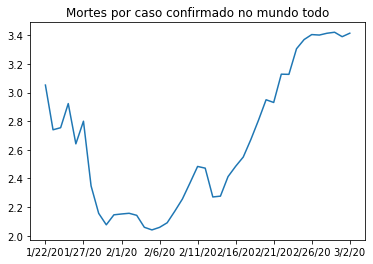

In [55]:
grouped_per_day['letality_rate_1'].plot()
plt.title("Mortes por caso confirmado no mundo todo")
plt.show()

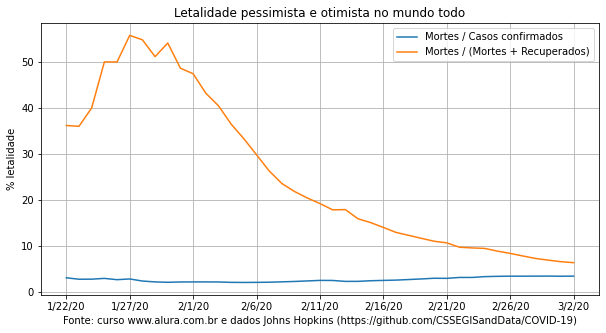

In [56]:
plt.figure(figsize=(10,5))
grouped_per_day['letality_rate_1'].plot()
ax = grouped_per_day['letality_rate_2'].plot()
plt.legend(['Mortes / Casos confirmados', 'Mortes / (Mortes + Recuperados)'])
plt.grid(linestyle='-')
ax.set_xlabel('Fonte: curso www.alura.com.br e dados Johns Hopkins (https://github.com/CSSEGISandData/COVID-19)')
ax.set_ylabel('% letalidade')

plt.title("Letalidade pessimista e otimista no mundo todo")
plt.show()

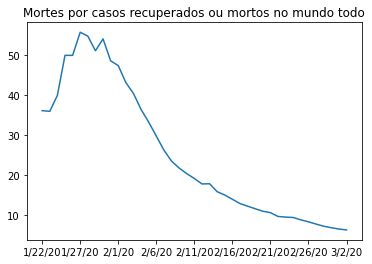

In [57]:
grouped_per_day['letality_rate_2'].plot()

plt.title("Mortes por casos recuperados ou mortos no mundo todo")
plt.show()